<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [433]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [457]:
house = pd.read_csv('../../../DSI-SF-4/datasets/housing_regression/housing.csv')

In [458]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

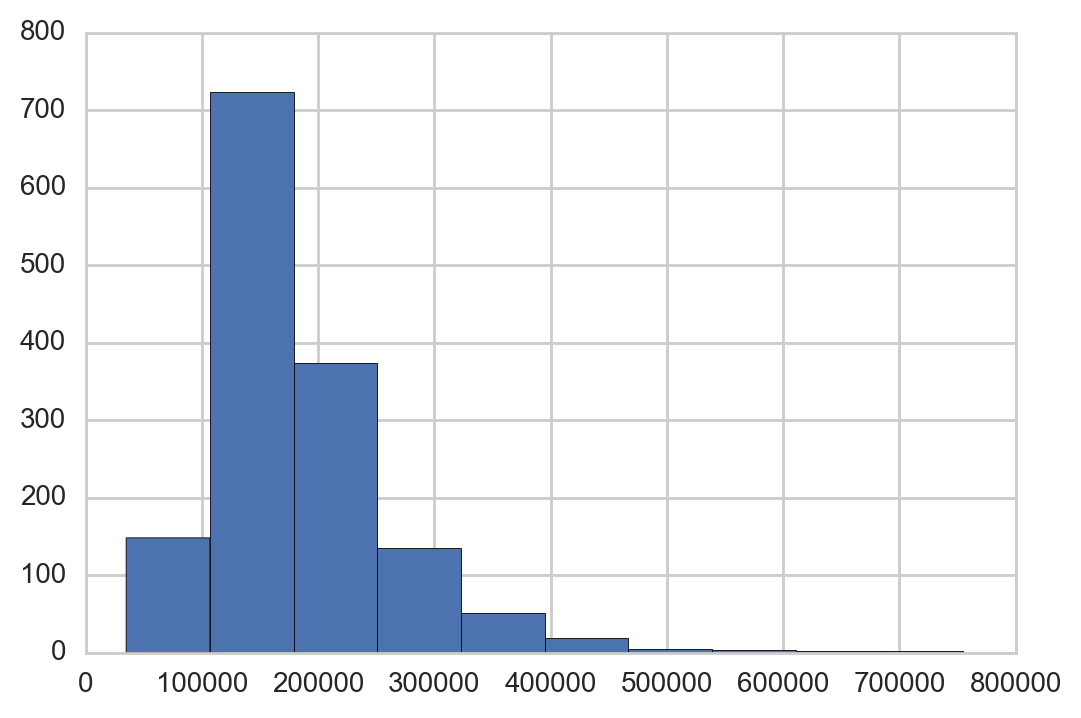

In [436]:
plt.hist(house.SalePrice)

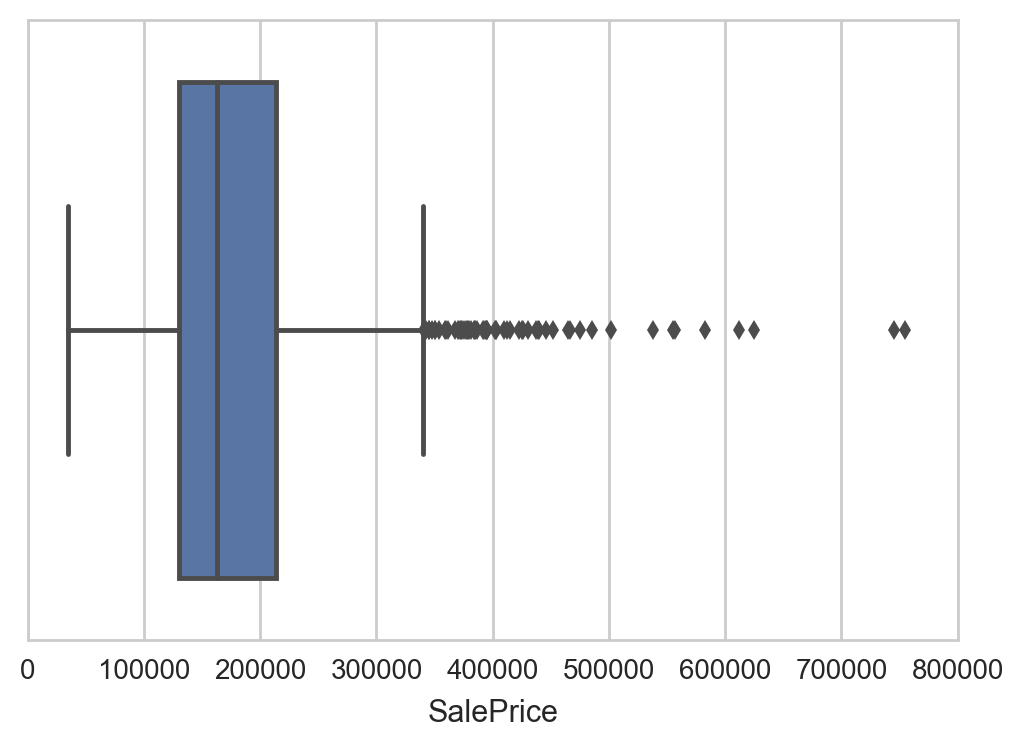

In [414]:
sns.boxplot(house.SalePrice)

### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

In [459]:
house['SalePrice_tlog'] = np.log(house.SalePrice)
house['SalePrice_troot'] = house['SalePrice']**(0.5)

(array([   5.,   12.,   54.,  184.,  470.,  400.,  220.,   90.,   19.,    6.]),
 array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
         11.68993448,  11.99735757,  12.30478066,  12.61220375,
         12.91962684,  13.22704994,  13.53447303]),
 <a list of 10 Patch objects>)

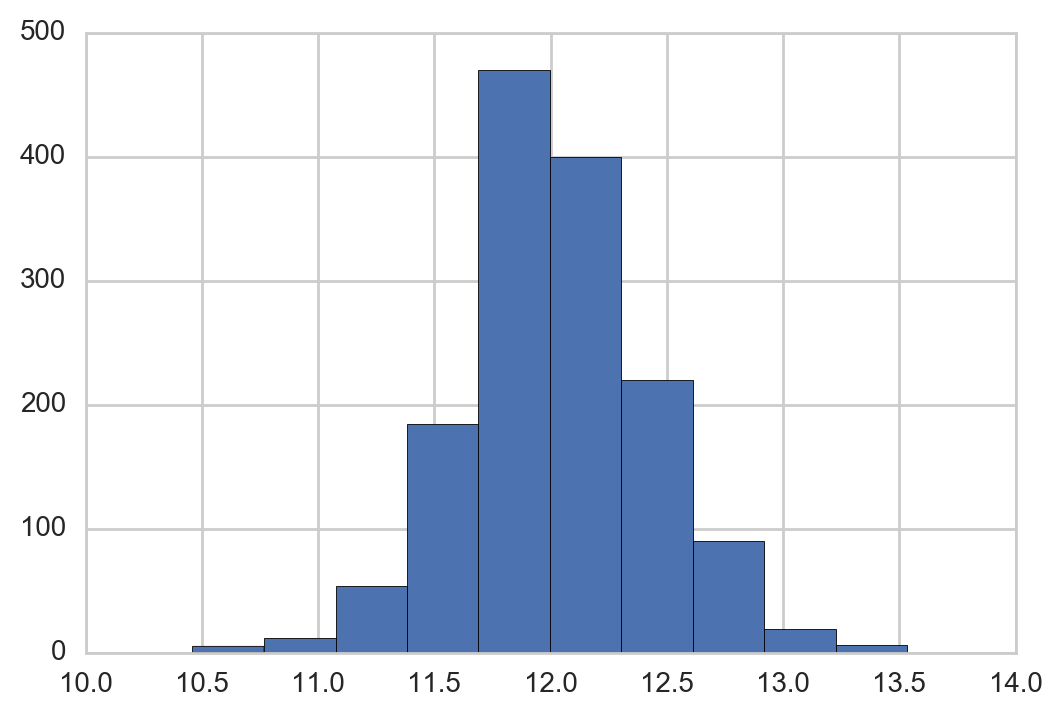

In [438]:
plt.hist(house.SalePrice_tlog)

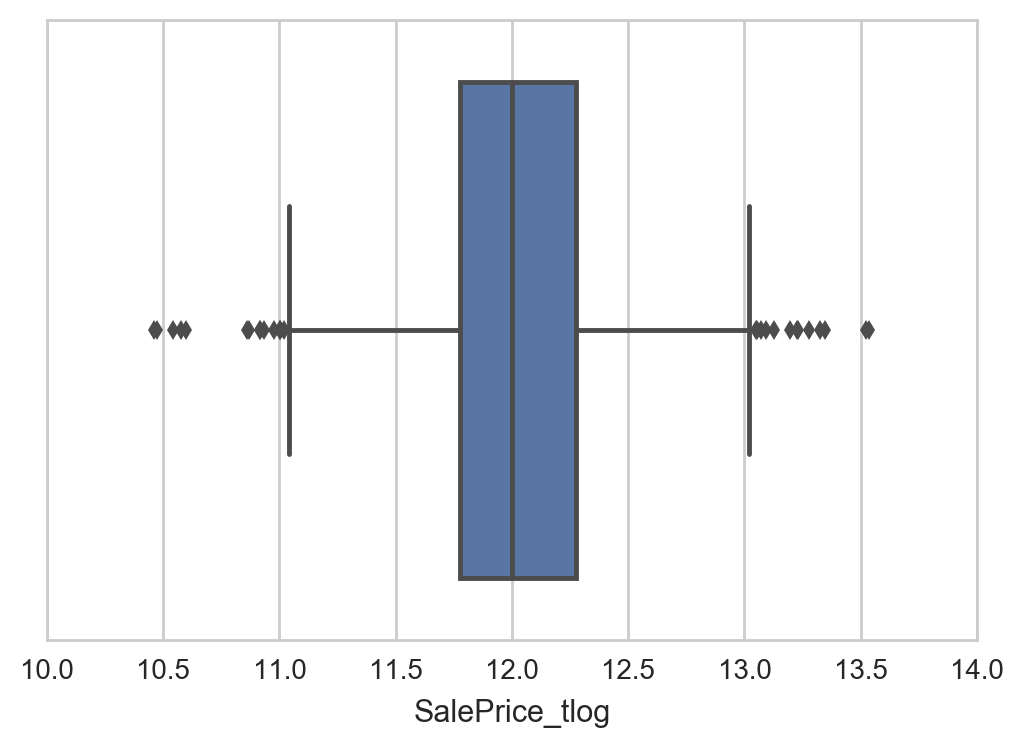

In [417]:
sns.boxplot(house.SalePrice_tlog)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


In [460]:
house['Age'] = 2016 - house.YearBuilt

In [440]:
print stats.pearsonr(house.Age,house.SalePrice)[0]
print stats.pearsonr(house.Age,house.SalePrice_tlog)[0]
print stats.pearsonr(house.Age,house.SalePrice_troot)[0]


-0.522897332879
-0.586570240384
-0.564283906439


### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

(-0.52289733287949691, 2.9902290990135257e-103)
(-0.56428390643929993, 1.5971139404150742e-123)
(-0.58657024038422678, 1.1035673374164091e-135)


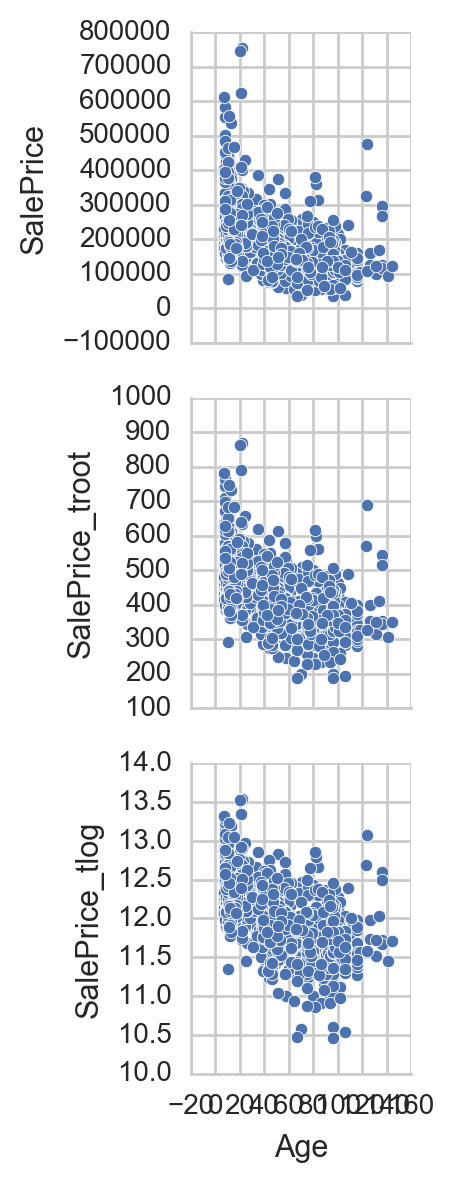

In [441]:
sns.pairplot(data=house,x_vars='Age',y_vars=['SalePrice','SalePrice_troot','SalePrice_tlog'],size=2)
print stats.pearsonr(house.Age,house.SalePrice)
print stats.pearsonr(house.Age,house.SalePrice_troot)
print stats.pearsonr(house.Age,house.SalePrice_tlog)

### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

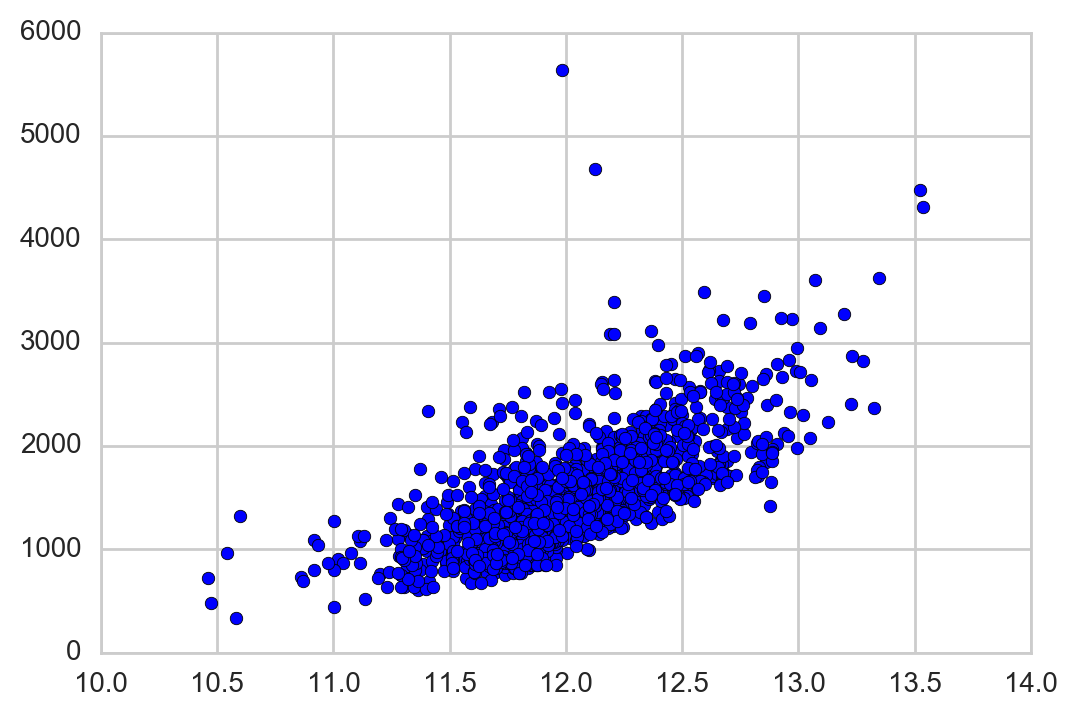

(0.70092665254412978, 3.0602089126803109e-216)

In [442]:
plt.scatter(house.SalePrice_tlog,house.GrLivArea)
plt.show()

#there is a linear relationship
stats.pearsonr(house.SalePrice_tlog,house.GrLivArea)

### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart sbows, if any?

In [461]:
house.select_dtypes(include=['int','float']).columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'SalePrice_tlog',
       'SalePrice_troot', 'Age'], dtype=object)

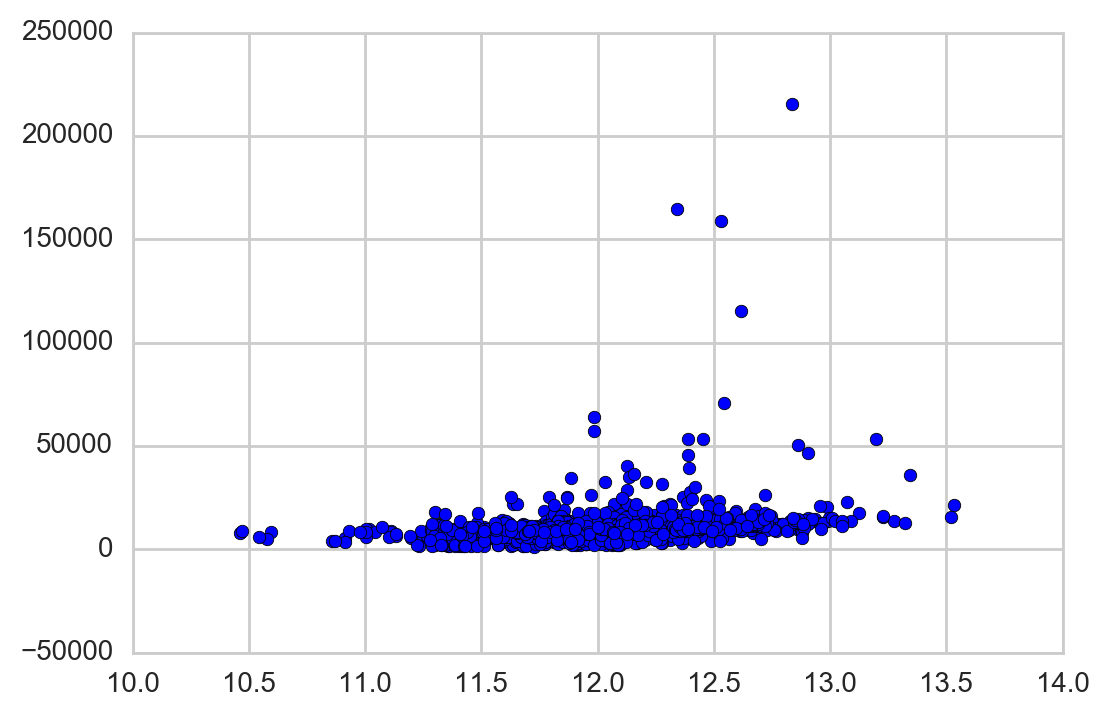

(0.25731989235273872, 1.6439921367364843e-23)

In [444]:
plt.scatter(house.SalePrice_tlog,house.LotArea)
plt.show()

#i chose these factors because i expect there will be a strong correlation between price and lotarea
# age and log price more corr than lotarea and log price !
stats.pearsonr(house.SalePrice_tlog,house.LotArea)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

In [462]:
house = house[house.MSZoning.isin(['RL','RH','RM'])] 

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

In [463]:
##this code finds any culumns with nan data
have_null_columns = []
for x in house.columns.values :
    if house[x].hasnans :
        have_null_columns.append(x+'--'+str(sum(house[x].isnull()))) 

have_null_columns

['LotFrontage--251',
 'Alley--1320',
 'MasVnrType--5',
 'MasVnrArea--5',
 'BsmtQual--37',
 'BsmtCond--37',
 'BsmtExposure--38',
 'BsmtFinType1--37',
 'BsmtFinType2--38',
 'Electrical--1',
 'FireplaceQu--641',
 'GarageType--79',
 'GarageYrBlt--79',
 'GarageFinish--79',
 'GarageQual--79',
 'GarageCond--79',
 'PoolQC--1378',
 'Fence--1108',
 'MiscFeature--1333']

In [464]:
#this code tries to Remove fetures that have few rows of data from the dataset. 
#these rows of data are complete except for those fetures, so i'm not 
#going to remove the rows. 

columns_for_drop = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu']

house = house.drop(columns_for_drop,axis=1)

In [465]:
house.BsmtQual     = house.BsmtQual.fillna(value='None')
house.BsmtCond     = house.BsmtCond.fillna(value='None')
house.BsmtExposure = house.BsmtExposure.fillna(value='None')
house.BsmtFinType1 = house.BsmtFinType1.fillna(value='None')
house.BsmtFinType2 = house.BsmtFinType2.fillna(value='None')

house.GarageType   = house.GarageType.fillna(value='None')
house.GarageYrBlt  = house.GarageYrBlt.fillna(value=0.)
house.GarageFinish = house.GarageFinish.fillna(value='None')
house.GarageCars   = house.GarageCars.fillna(value=2)
house.GarageArea   = house.GarageArea.fillna(value=0)
house.GarageQual   = house.BsmtFinType2.fillna(value='None')
house.GarageCond   = house.BsmtFinType2.fillna(value='None')

house.MasVnrType   = house.MasVnrType.fillna(value='None')
house.MasVnrArea   = house.MasVnrArea.fillna(value=0.)

house.Electrical   = house.Electrical.fillna(value='None')

house.LotFrontage   = house.LotFrontage.fillna(value=0.)


### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

In [466]:
categorical_columns = list(house.select_dtypes(include=['object']).columns.values)

for i in categorical_columns : 
    print i, house[i].unique(),house[i].value_counts()


MSZoning ['RL' 'RM' 'RH'] RL    1151
RM     218
RH      16
Name: MSZoning, dtype: int64
Street ['Pave' 'Grvl'] Pave    1381
Grvl       4
Name: Street, dtype: int64
LotShape ['Reg' 'IR1' 'IR2' 'IR3'] Reg    864
IR1    473
IR2     38
IR3     10
Name: LotShape, dtype: int64
LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] Lvl    1240
Bnk      62
HLS      49
Low      34
Name: LandContour, dtype: int64
Utilities ['AllPub' 'NoSeWa'] AllPub    1384
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] Inside     991
Corner     254
CulDSac     93
FR2         44
FR3          3
Name: LotConfig, dtype: int64
LandSlope ['Gtl' 'Mod' 'Sev'] Gtl    1310
Mod      62
Sev      13
Name: LandSlope, dtype: int64
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] NAmes   

In [467]:
numneric_clolumns = list(house.select_dtypes(include=['int','float']).columns.values)

for i in numneric_clolumns :
    print i, np.var(house[i]), np.mean(house[i])

Id 178408.033356 732.506137184
MSSubClass 1670.23503499 55.3285198556
LotFrontage 1220.36542429 57.7920577617
LotArea 103674230.773 10706.1588448
OverallQual 1.88477159874 6.06353790614
OverallCond 1.26650731796 5.60794223827
YearBuilt 889.24747931 1970.04837545
YearRemodAdd 422.171567986 1984.12129964
MasVnrArea 30312.2915477 102.397833935
BsmtFinSF1 210741.108945 450.666425993
BsmtFinSF2 27290.662965 49.0700361011
BsmtUnfSF 196221.55077 562.882310469
TotalBsmtSF 196802.969467 1062.61877256
1stFlrSF 150021.520748 1172.8967509
2ndFlrSF 190168.913972 336.516967509
LowQualFinSF 2291.09977192 5.61732851986
GrLivArea 283606.651022 1515.03104693
BsmtFullBath 0.27143531129 0.432490974729
BsmtHalfBath 0.0592245435233 0.0599277978339
FullBath 0.303942446793 1.54873646209
HalfBath 0.250155221624 0.368953068592
BedroomAbvGr 0.672791773645 2.88231046931
KitchenAbvGr 0.0503673969425 1.04837545126
TotRmsAbvGrd 2.63556673487 6.53790613718
Fireplaces 0.421485487886 0.627436823105
GarageYrBlt 210860.8

In [468]:
# As i see in data, column Utilities, has only two values, and one of the values only occur once! so it could't have
# any affect on data and im going to remove it from data 

house = house.drop('Utilities',axis=1)

In [469]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_tlog,SalePrice_troot,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,12.247694,456.618002,13
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,12.109011,426.028168,40
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,12.317167,472.757866,15
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,11.849398,374.165739,101
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,12.429216,500.000000,16


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

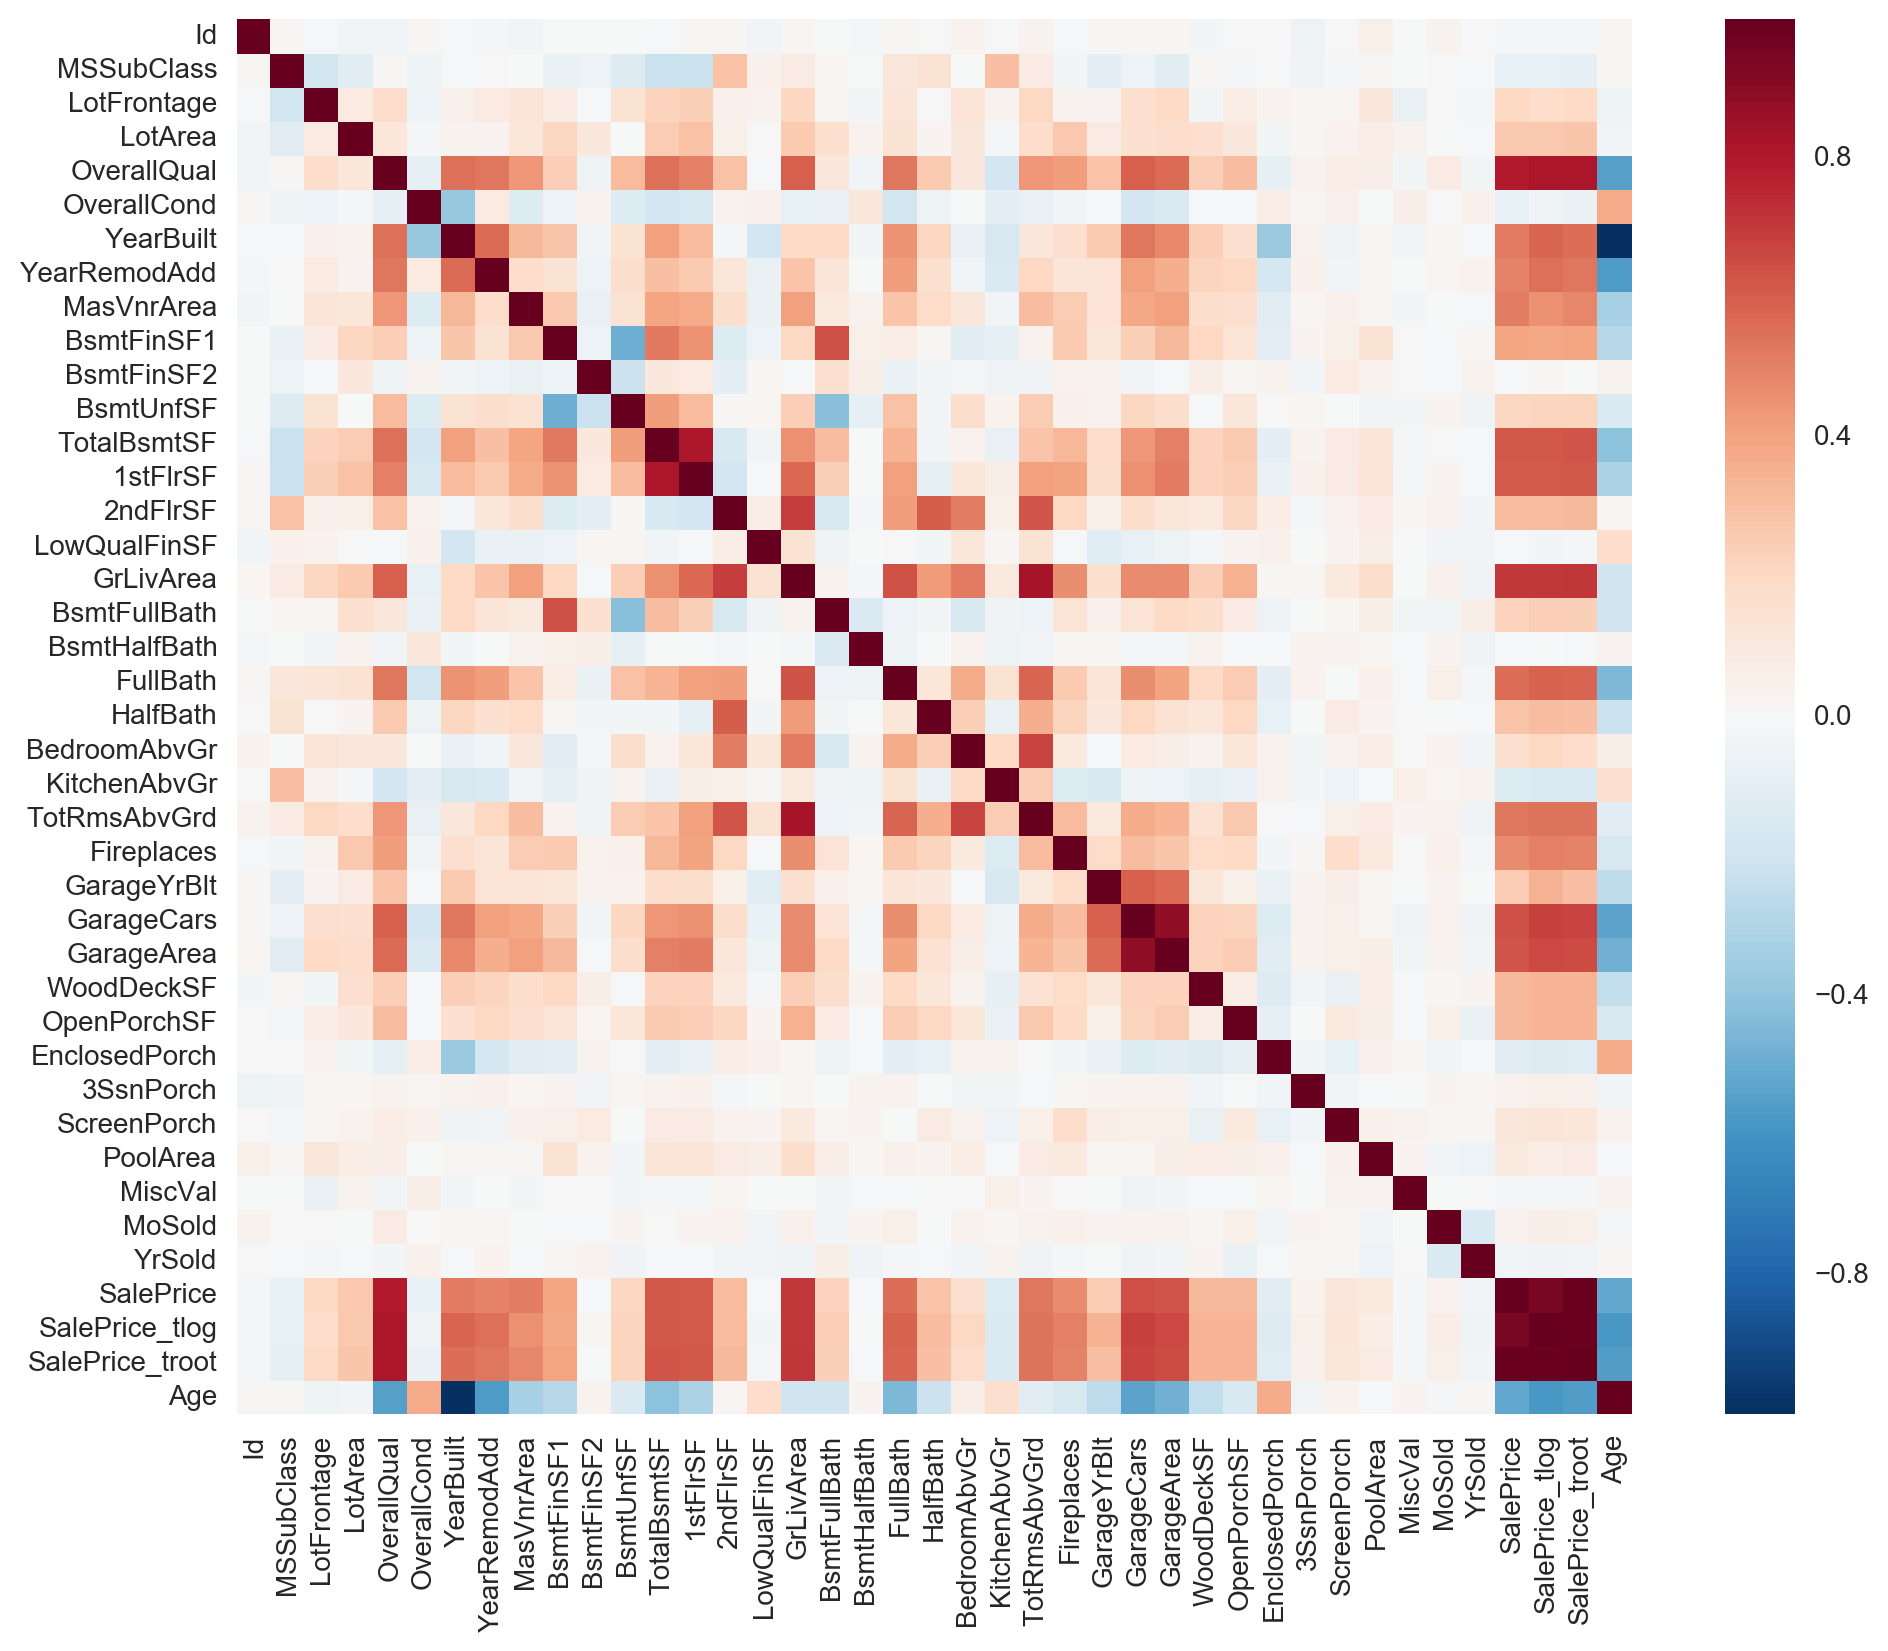

In [470]:
house_corr = house[numneric_clolumns].corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(house_corr,vmax=0.8,square=True)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

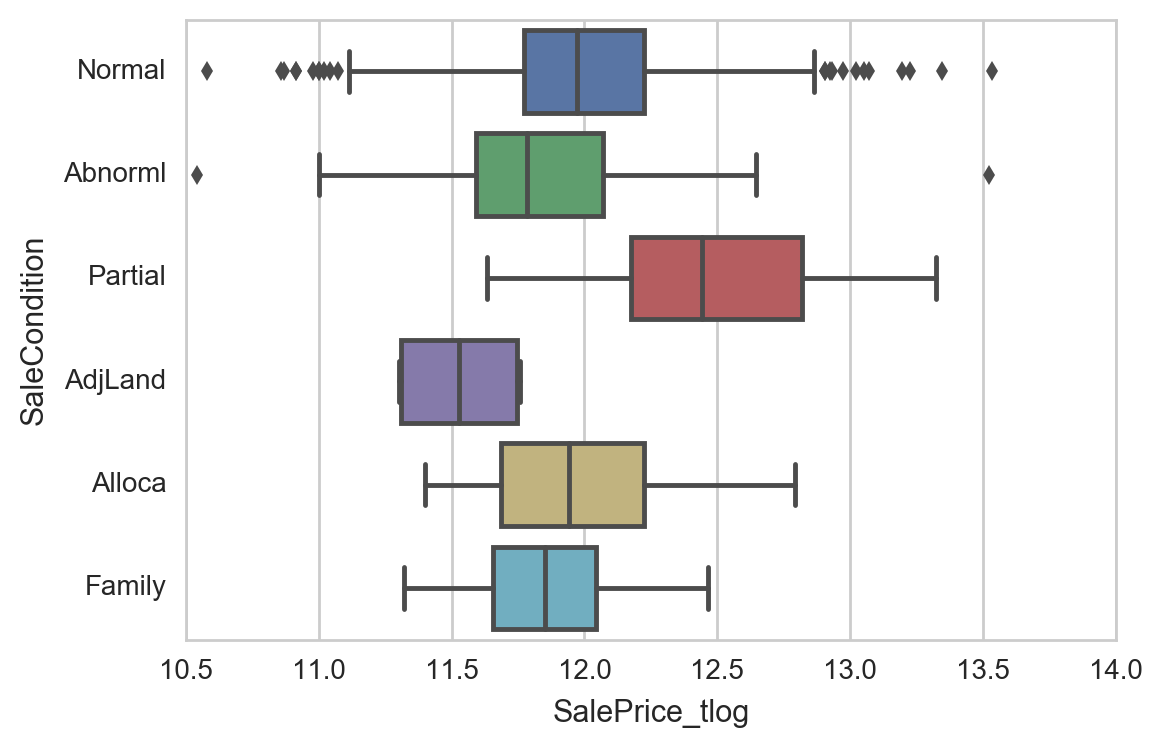

In [471]:
sns.boxplot(x=house.SalePrice_tlog,y=house.SaleCondition)

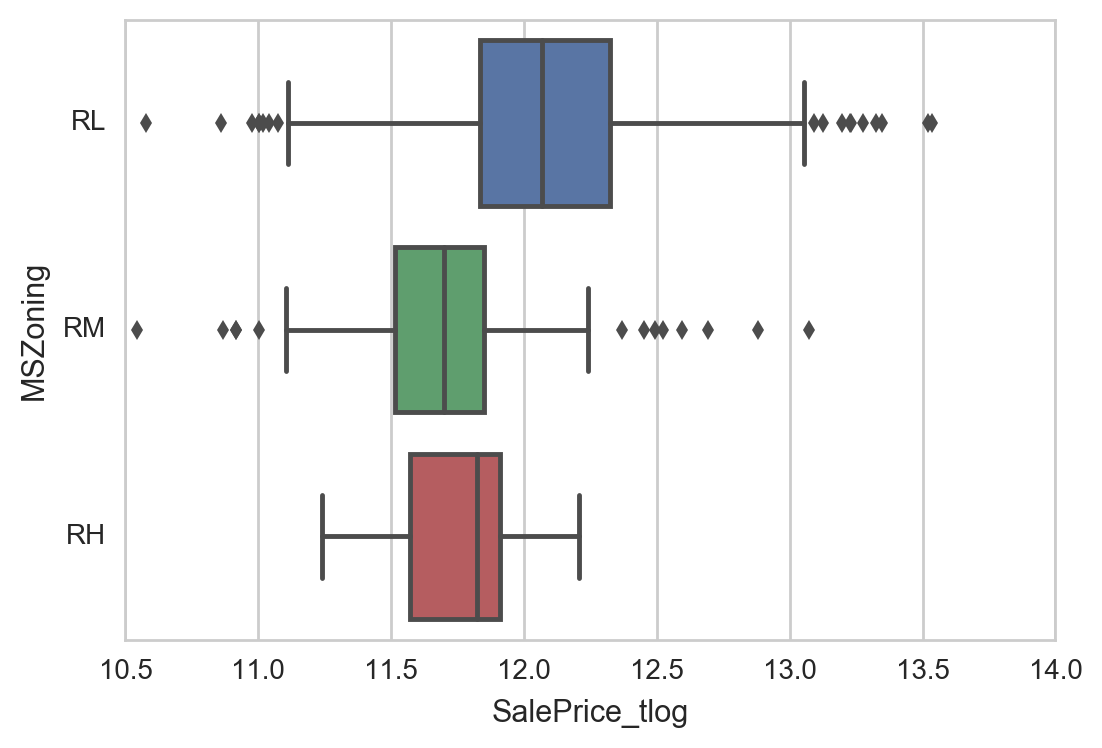

In [472]:
sns.boxplot(x=house.SalePrice_tlog,y=house.MSZoning)

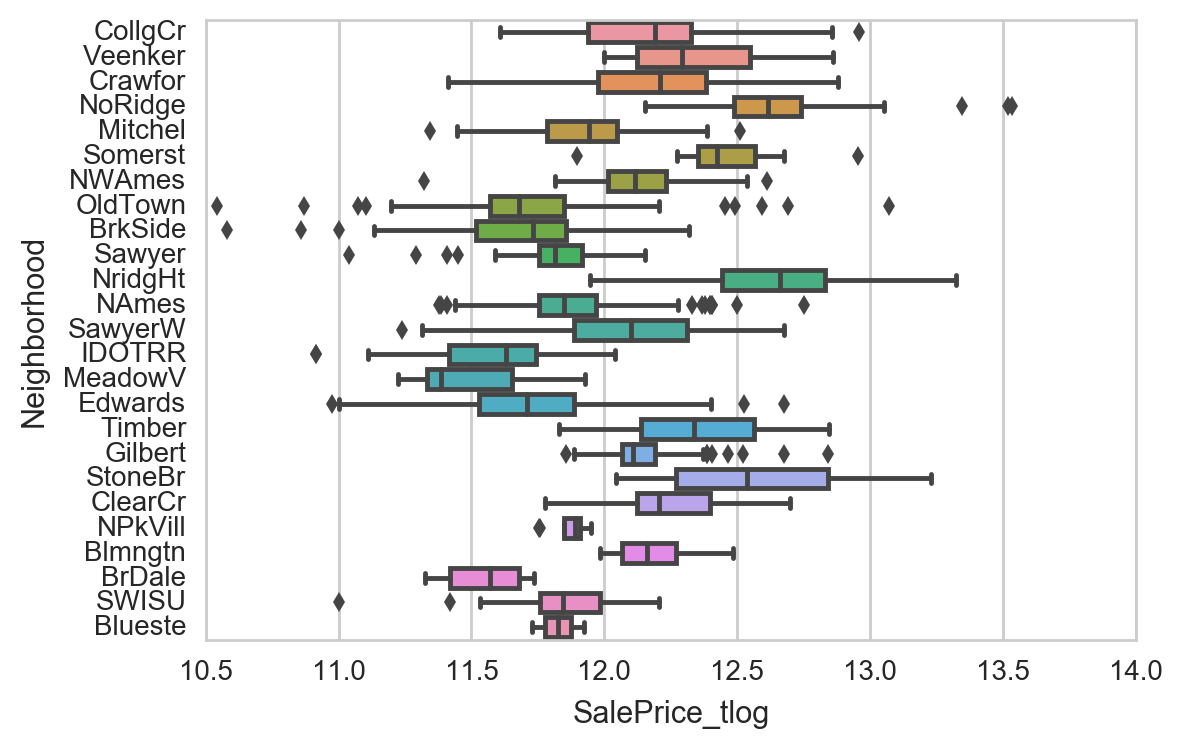

In [473]:
sns.boxplot(x=house.SalePrice_tlog,y=house.Neighborhood)

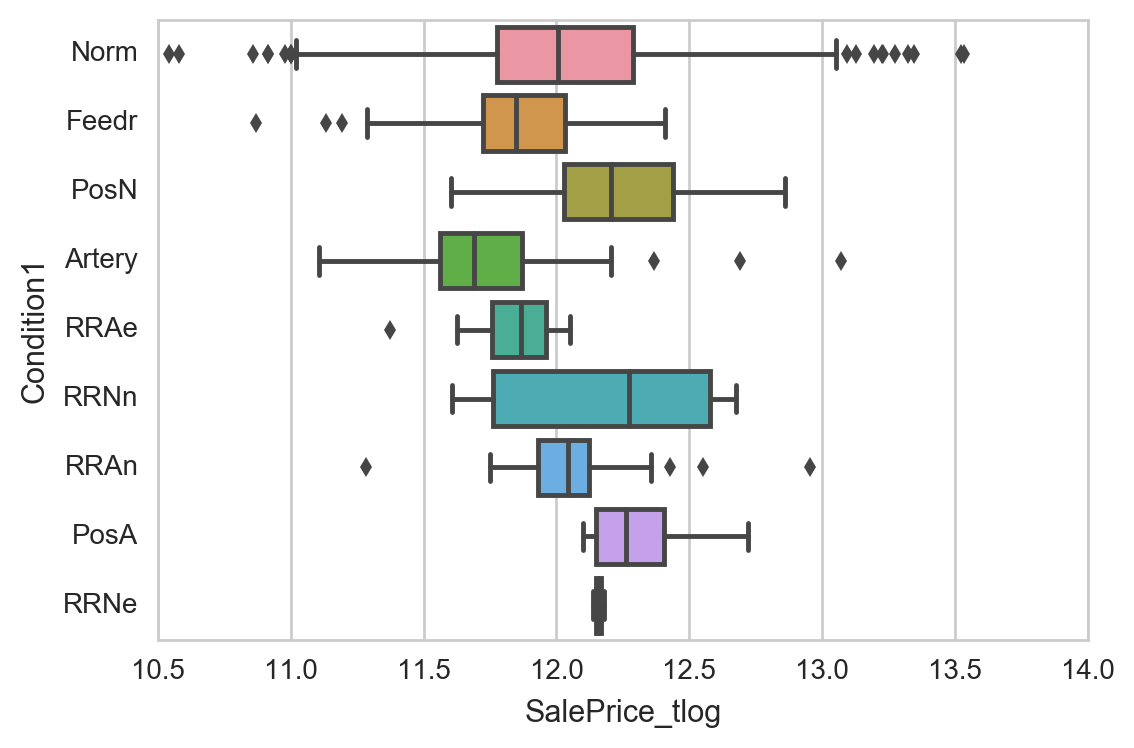

In [474]:
sns.boxplot(x=house.SalePrice_tlog,y=house.Condition1)

In [ ]:
sns.boxplot(x=house.SalePrice_tlog,y=house.LotShape)

In [ ]:
sns.boxplot(x=house.SalePrice_tlog,y=house.HouseStyle)

In [ ]:
sns.boxplot(x=house.SalePrice_tlog,y=house.CentralAir)

In [ ]:
sns.boxplot(x=house.SalePrice_tlog,y=house.Heating)

In [ ]:
sns.boxplot(x=house.SalePrice_tlog,y=house.KitchenQual)

In [ ]:
sns.boxplot(x=house.SalePrice_tlog,y=house.Functional)

In [ ]:
sns.boxplot(x=house.SalePrice_tlog,y=house.GarageCond)

In [ ]:
sns.boxplot(x=house.SalePrice_tlog,y=house.SaleType)

In [ ]:
sns.boxplot(x=house.SalePrice_tlog,y=house.PavedDrive)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


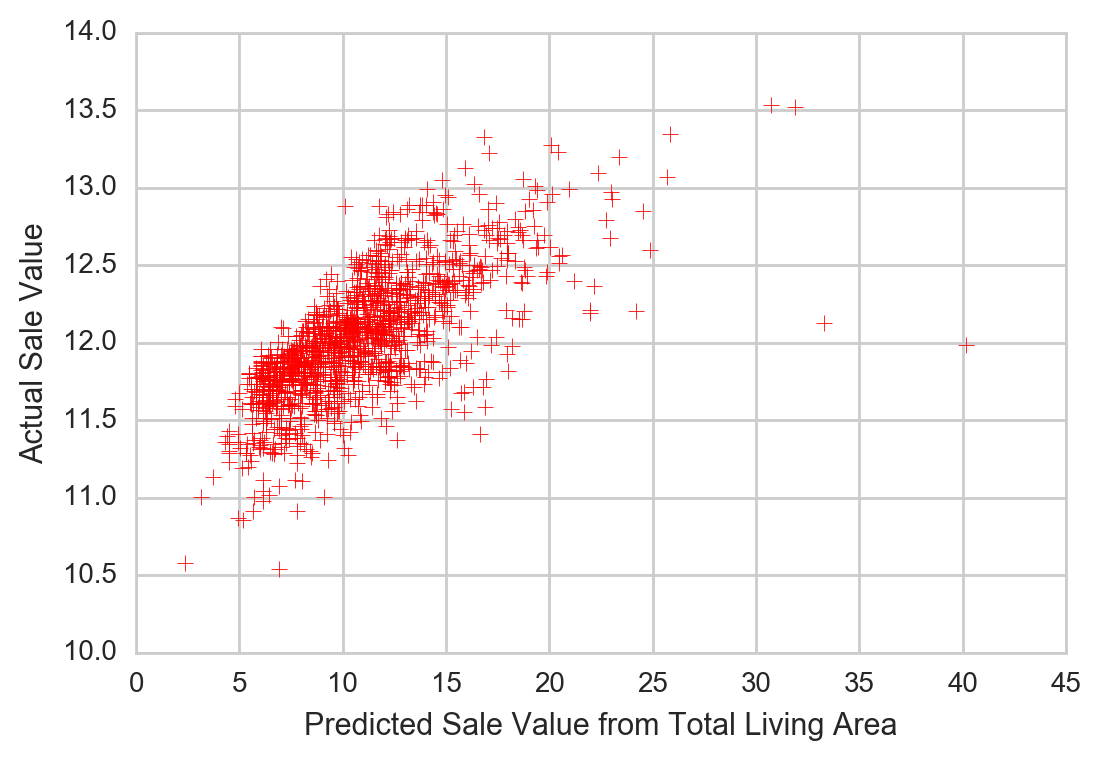

MSE: 13.9397824249


In [475]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error 

X = house.GrLivArea
y = house.SalePrice_tlog

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Sale Value from Total Living Area")
plt.ylabel("Actual Sale Value")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [309]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SalePrice_tlog   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.298e+04
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        14:14:14   Log-Likelihood:                -3789.8
No. Observations:                1385   AIC:                             7582.
Df Residuals:                    1384   BIC:                             7587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GrLivArea      0.0071   6.25e-05    113.914      0.000       0.007       0.007
==============================================================================
Omnibus:                      483.470   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2633.685
Skew:                          -1.529   Prob(JB):                         0.00
Kurtosis:                       9.024   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

In [323]:
# I have transformed the SalePrice to logarithmic values, so my coofficcient is a log value. 
# so small values for cooefficient and p-values, they are small but the are strong because all the values have the log
#format

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

MSE: 0.0205171972999

----------------
COEFS: [('LotFrontage', array([ -2.75677644e-05,   2.08475537e-06,   8.04121089e-02,
         4.69753549e-02,   1.34438492e-03,   9.75565618e-04,
         1.34371452e-07,   2.97525003e-05,   1.52711012e-05,
         9.11706234e-06,   5.41406638e-05,   8.77157902e-05,
         3.71656274e-05,  -1.64745226e-05,   1.08406895e-04,
         6.05389295e-02,   1.78220777e-02,   3.03399659e-02,
         1.84260501e-02,   6.87621034e-04,  -9.59248265e-02,
         2.02467681e-02,   4.42872272e-02,   7.11829994e-06,
         6.99704744e-02,   2.71340701e-05,   1.29170121e-04,
         9.22124462e-06,   1.91238047e-04,   2.55749759e-04,
         3.63842592e-04,  -3.82008465e-04,  -2.06097917e-06,
         1.22418637e-03,  -6.43197624e-03,  -1.34438492e-03]))]


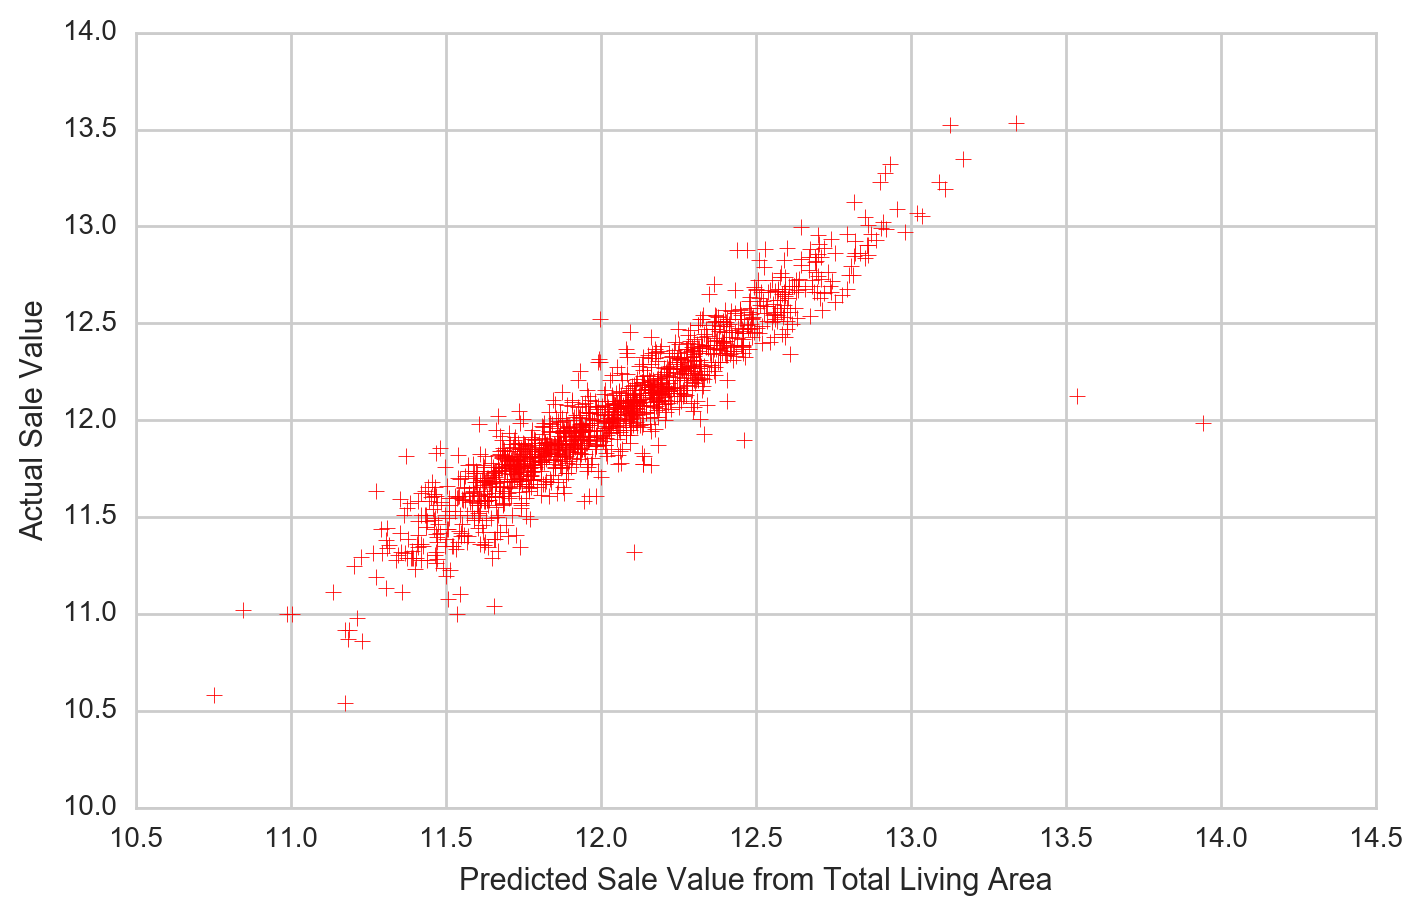

In [485]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

X = house[['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                         'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                         'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
                         'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
                         'PoolArea','MiscVal','MoSold','YrSold','Age']]
y = house[['SalePrice_tlog']]

model = lm.fit(X, y)
predictions = model.predict(X)


print "MSE:", mean_squared_error(y, predictions)
print "\n----------------\nCOEFS:", zip(X.columns, model.coef_)

plt.figure(figsize=(8, 5))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Sale Value from Total Living Area")
plt.ylabel("Actual Sale Value")
plt.show()

### 8.2 Calculate the $R^2$ of your model.

In [487]:
print "R^2:", model.score(X, y)

R^2: 0.868333021185


### 8.3 Plot the residuals against the true values.

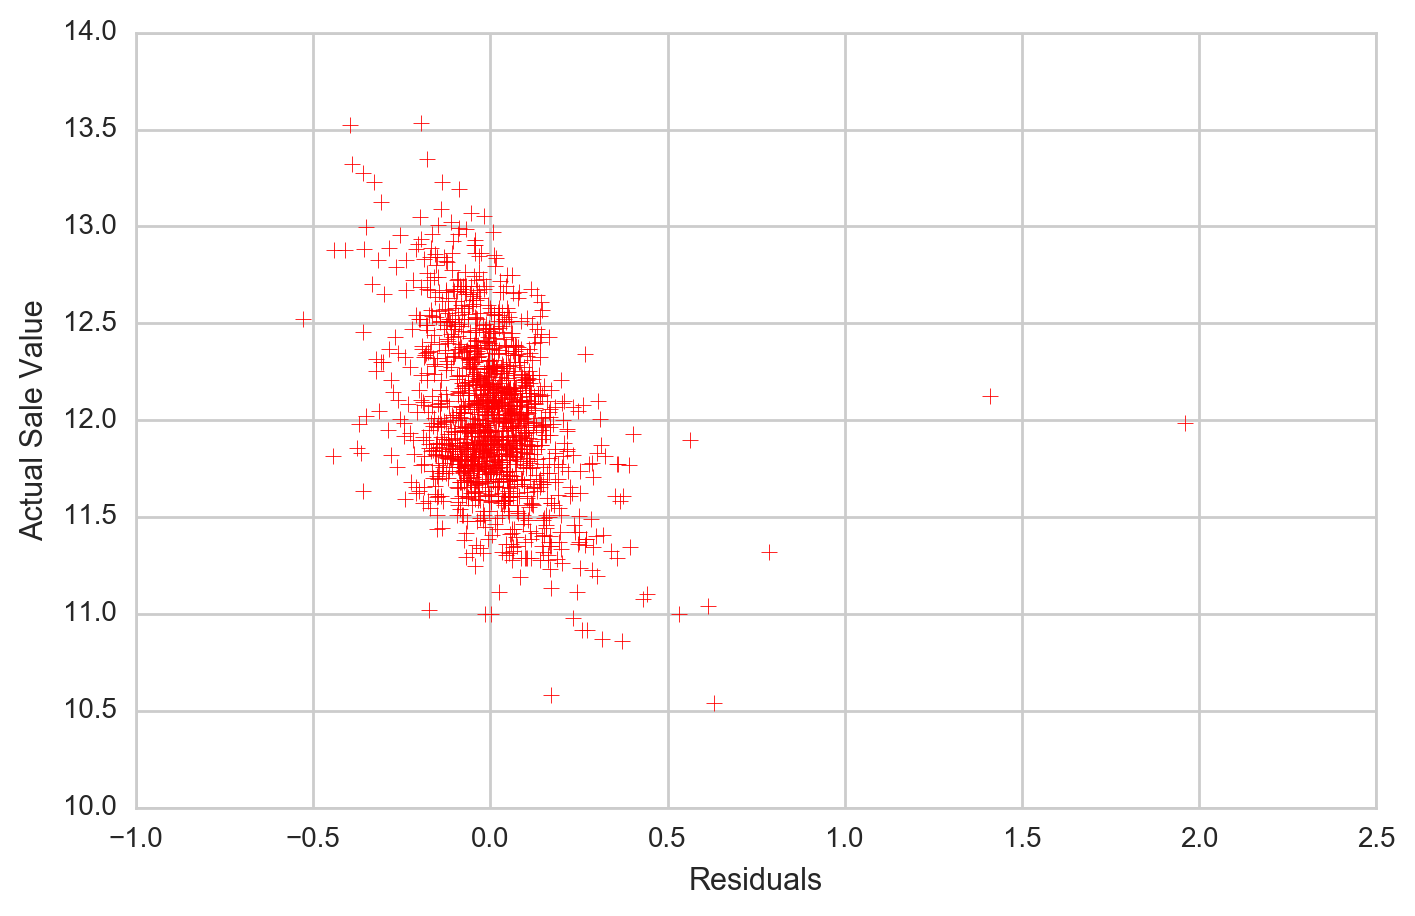

In [488]:
predictions = model.predict(X)
plt.figure(figsize=(8, 5))
plt.scatter(predictions -y, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Residuals")
plt.ylabel("Actual Sale Value")
plt.show()

### 8.4 Plot a histogram of the residuals.

(array([   2.,    2.,    9.,   24.,   79.,  170.,  225.,  208.,  236.,
         179.,  115.,   71.,   39.,   17.,    5.,    1.,    1.,    1.,
           0.,    1.]),
 array([ 10.75037605,  10.90999273,  11.06960941,  11.22922609,
         11.38884277,  11.54845945,  11.70807613,  11.8676928 ,
         12.02730948,  12.18692616,  12.34654284,  12.50615952,
         12.6657762 ,  12.82539288,  12.98500956,  13.14462624,
         13.30424292,  13.4638596 ,  13.62347628,  13.78309296,  13.94270964]),
 <a list of 20 Patch objects>)

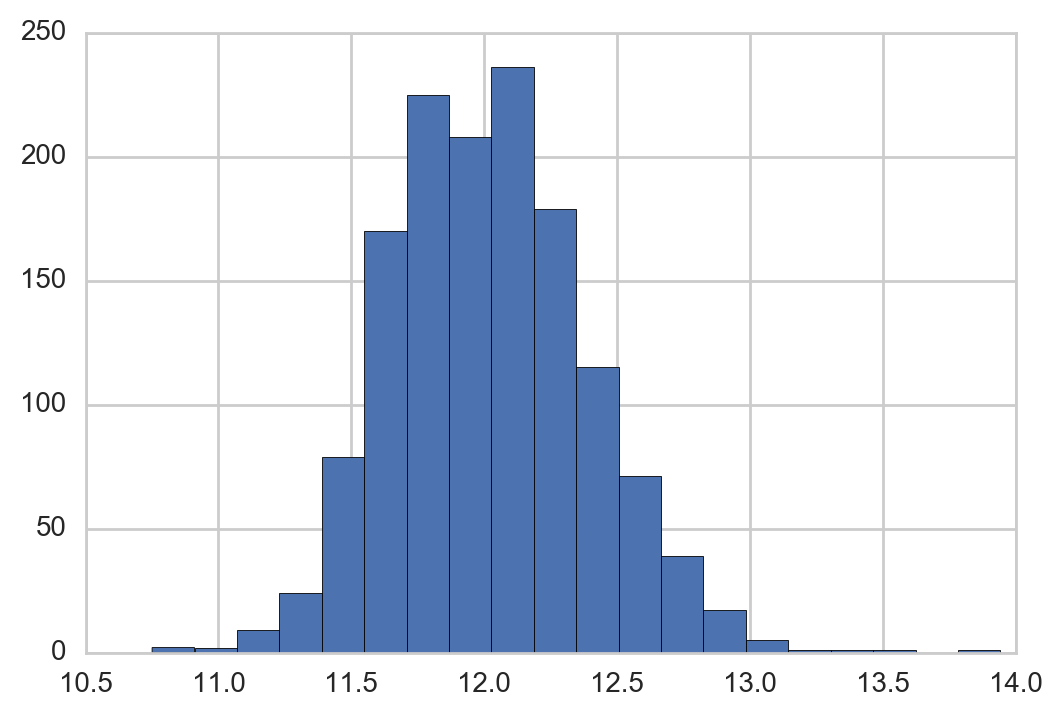

In [492]:
plt.hist(predictions ,bins=20)

### 8.5 Make a plot to show the strength of the different coefficients.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

In [367]:
for i in house.columns.values :
    if i[0] in '123456789' :
        print i
        
house = house.rename(columns={'1stFlrSF':'first_stFlrSF' ,'2ndFlrSF':'second_ndFlrSF','3SsnPorch':'thirth_SsnPorch'})

In [366]:
import patsy

target = 'SalePrice_tlog'
non_target_numeric_cols = [c for c in house.columns if c != 'target']

formula = target + ' ~ ' + ' + '.join(non_target_numeric_cols) +' + C('+' + '.join(categorical_columns) +')'+' -1'
#print formula


y, X = patsy.dmatrices(formula, data=house)


### 9.2 Fit a linear regression using all of the predictors and score it.

In [371]:
lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = model.predict(X)


print "MSE:", mean_squared_error(y, predictions)
print "Score:", model.score(X,y)


MSE: 1.33106014467e-25
Score: 1.0


### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

In [369]:
#come back

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

Cross-validated scores: [ 1.          1.          1.          0.99939337  1.          1.          1.
  1.          0.99999992  0.99999943  1.          0.99866728  1.          1.
  1.          1.          0.99999915  0.99992973  1.          0.99919553]
Cross-Predicted Accuracy: 0.999900777537


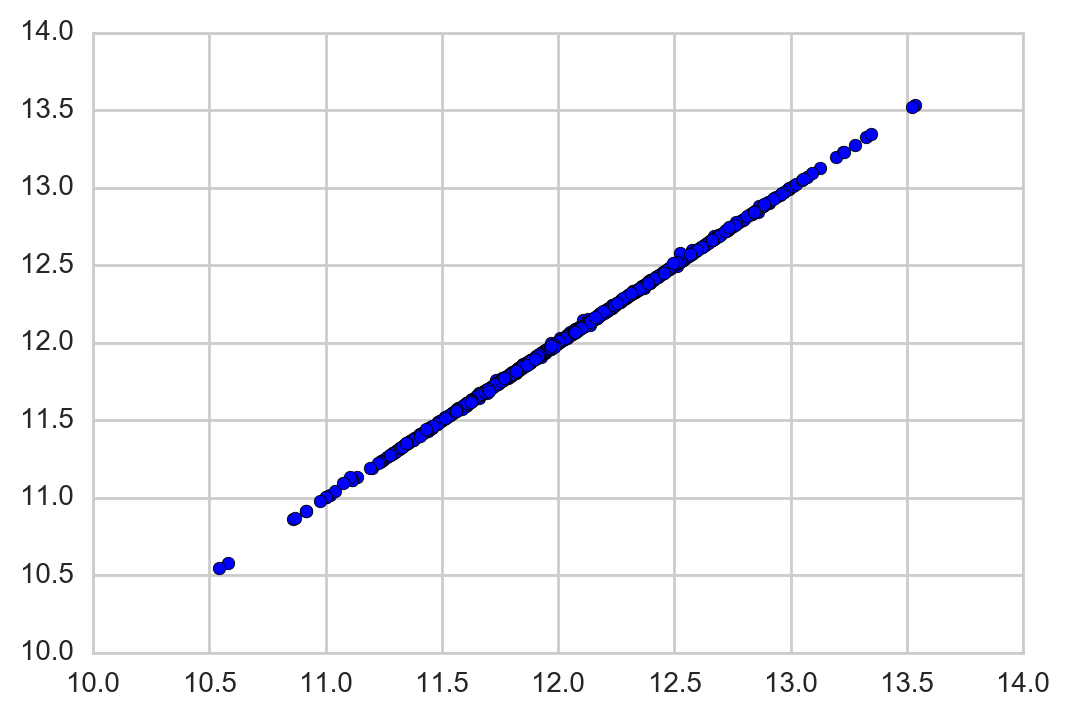

In [372]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

predictions = cross_val_predict(lm, X, y, cv=20)
plt.scatter(y, predictions)

scores = cross_val_score(model, X, y, cv=20)
print "Cross-validated scores:", scores

accuracy = metrics.r2_score(y, predictions)

print "Cross-Predicted Accuracy:", accuracy

### 10.2 What does the cross-validated average $R^2$ tell you?

In [373]:
print np.mean(scores)

0.99985922038


In [ ]:
#

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

In [376]:
from sklearn.linear_model import Lasso,LassoCV
lasso_cv = LassoCV(n_alphas=200, cv = 10,verbose=1, normalize= True)
lasso_cv.fit(X,y)

/Users/behdad/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=1)

In [377]:
lasso_cv.alpha_

1.0607076362543112e-05

### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

In [380]:
lasso = Lasso(alpha=lasso_cv.alpha_,)
lasso.fit(X,y)
lasso_scores = cross_val_score(lasso,X,y,cv=10)
lasso_scores

array([ 0.99995988,  0.99996929,  0.99995927,  0.99990919,  0.9998002 ,
        0.99990807,  0.99984941,  0.99987577,  0.9996834 ,  0.99991548])

In [381]:
np.mean(lasso_scores)

0.9998829957272235

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

In [383]:
np.sum(lasso.coef_ != 0)

113

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

In [396]:
SF_columns = []
for x in house.columns.values : 
    if "SF" in x :
        SF_columns.append(x)
Xsf = house[SF_columns]

### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

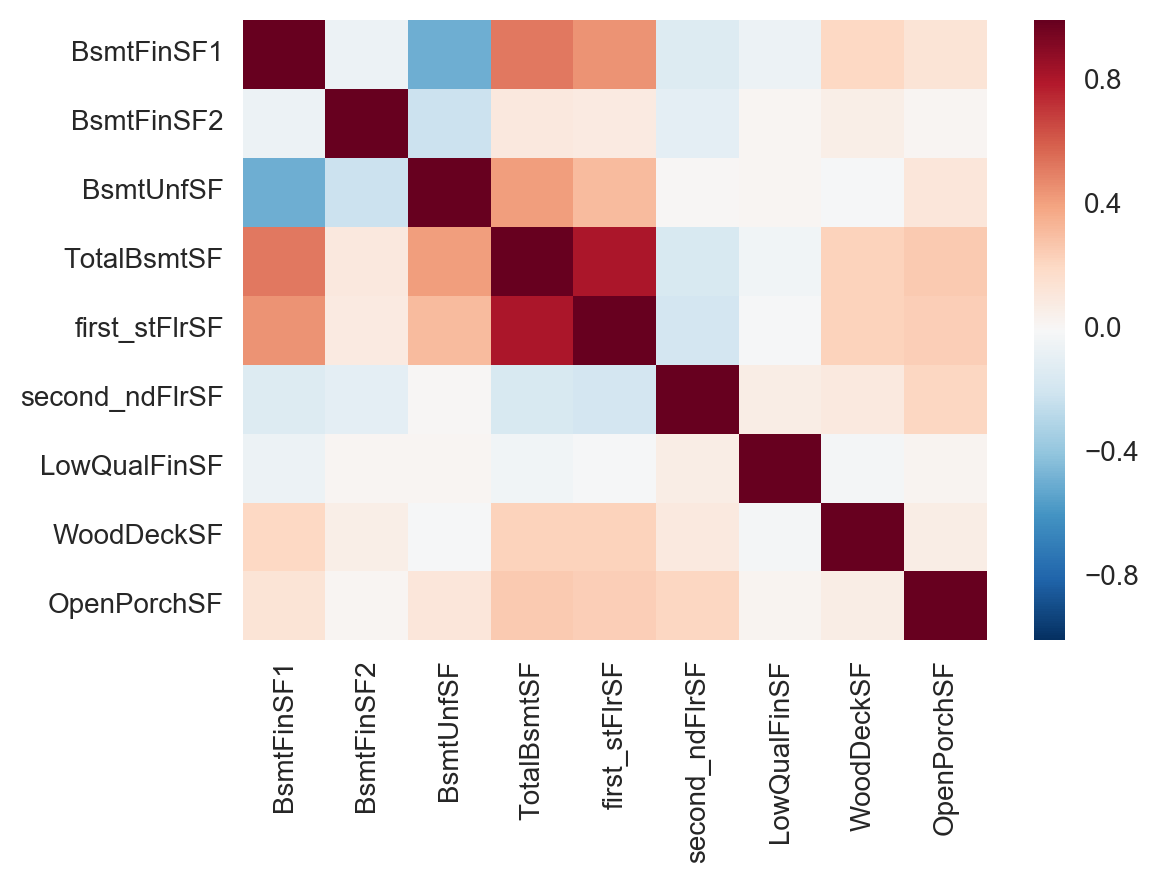

In [398]:
sns.heatmap(Xsf.corr())


### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



In [391]:
from sklearn.linear_model import Ridge,RidgeCV

In [392]:
alphas = np.logspace(-1,5,200)

In [393]:
ridge_cv = RidgeCV(alphas=alphas,cv=20,normalize=True)

In [394]:
ridge_cv.fit(Xsf,y)

RidgeCV(alphas=array([  1.00000e-01,   1.07189e-01, ...,   9.32930e+04,   1.00000e+05]),
    cv=20, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [395]:
ridge_cv.alpha_

100000.0

### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

In [400]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge_scores = cross_val_score(ridge,Xsf,y,cv=10)
ridge.fit(Xsf,y)

Ridge(alpha=100000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [402]:
ridge_scores

array([ 0.7223155 ,  0.71059295,  0.71698807,  0.59514407,  0.72732812,
        0.71970253,  0.6547629 ,  0.67357036, -0.22762631,  0.69550704])

In [403]:
np.mean(ridge_scores)

0.59882852207220361

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**